# T-Intersection Determination
Finds all roads that form a T-intersection with a boundary polygon.

In [2]:
import fiona
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt

# test data. LU and roads layers are desired
gpkg = r'../../../sequencing/testdata/public.gpkg'

In [3]:
roads = gpd.read_file(gpkg, layer='NGD_AL')
poly = gpd.read_file(gpkg, layer='LU')

print("Total road segments: {}".format(len(roads)))
print("Total polygons: {}".format(len(poly)))

# force a crs for roads since the dataset doesn't have one
roads.crs = {'init': 'epsg:3347'}

Total road segments: 34635
Total polygons: 1415


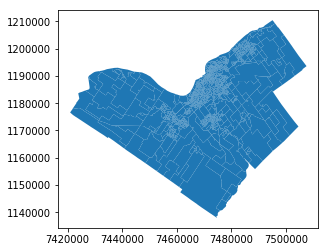

In [10]:
# Preview of the polygon features
poly.plot()

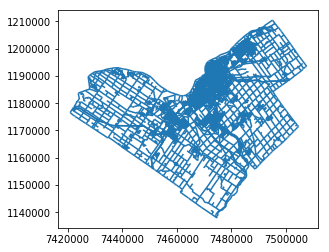

In [11]:
# Preview of the road features
roads.plot()

In [ ]:
# get the list of LineStrings that represent the boundary
bounds = poly.geometry.boundary

Some of the roads are those that form the boundary, which means they are coincident and therefore not a T intersection. These roads are filtered out through their segment type code.

In [43]:
def is_t(arc):
    match = False
    # filter takes longer, presumably because it doesn't bail as soon as a match is found
#     touched = filter(arc.touches, list(bounds))
#     if list(touched):
#         match = True
    for edge in list(bounds):
        if arc.touches(edge):
            match = True
            break # bail on match, no point in finding more
    return match

# filter out arcs that are not based on a road
roads['is_t'] = roads[roads['SGMNT_TYP_CDE'] == 2].geometry.apply(lambda r: is_t(r))
print("Number of T intersections: {}".format(len(roads[roads['is_t'] == True])))

Number of T intersections: 15873


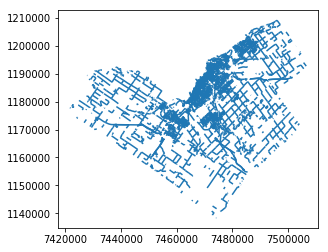

In [44]:
roads[roads['is_t'] == True].plot()

The first thing that needs to be found is where there are any roads intersecting with a boundary.